c:\Users\user\.conda\envs\RS\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


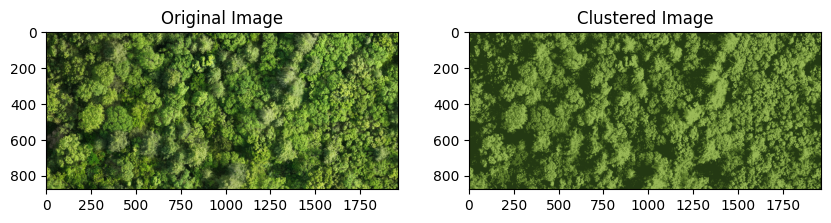

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Read the image
file_path = "h:\\Yehmh\\DNDF\\Clipped_image\\101_1_clipped_image.tif"
image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

if image is None:
    print("Image could not be loaded.")
else:
    # Step 2: Preprocess the image data
    # Extract RGB and alpha channels
    rgb_image = image[:, :, :3]
    alpha_channel = image[:, :, 3]
    
    # Mask where alpha is not zero
    mask = alpha_channel != 0

    # Select only RGB pixels where alpha is not zero
    rgb_pixels = rgb_image[mask]

    # Normalize pixel values to [0, 1]
    rgb_pixels = rgb_pixels / 255.0

    # Step 3: Apply K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=0)  # Change n_clusters to desired number of clusters
    kmeans.fit(rgb_pixels)
    clustered = kmeans.cluster_centers_[kmeans.labels_]

    # Rescale clustered values back to [0, 255]
    clustered = np.clip(clustered * 255, 0, 255).astype(np.uint8)

    # Step 4: Reconstruct the clustered image
    clustered_image = np.zeros_like(rgb_image)
    clustered_image[mask] = clustered

    # Combine clustered image with original alpha channel
    output_image = np.dstack((clustered_image, alpha_channel))

    # Display the original and clustered images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA))  # Convert BGRA to RGBA for displaying

    plt.subplot(1, 2, 2)
    plt.title("Clustered Image")
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGRA2RGBA))  # Convert BGRA to RGBA for displaying

    plt.show()


c:\Users\user\.conda\envs\RS\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


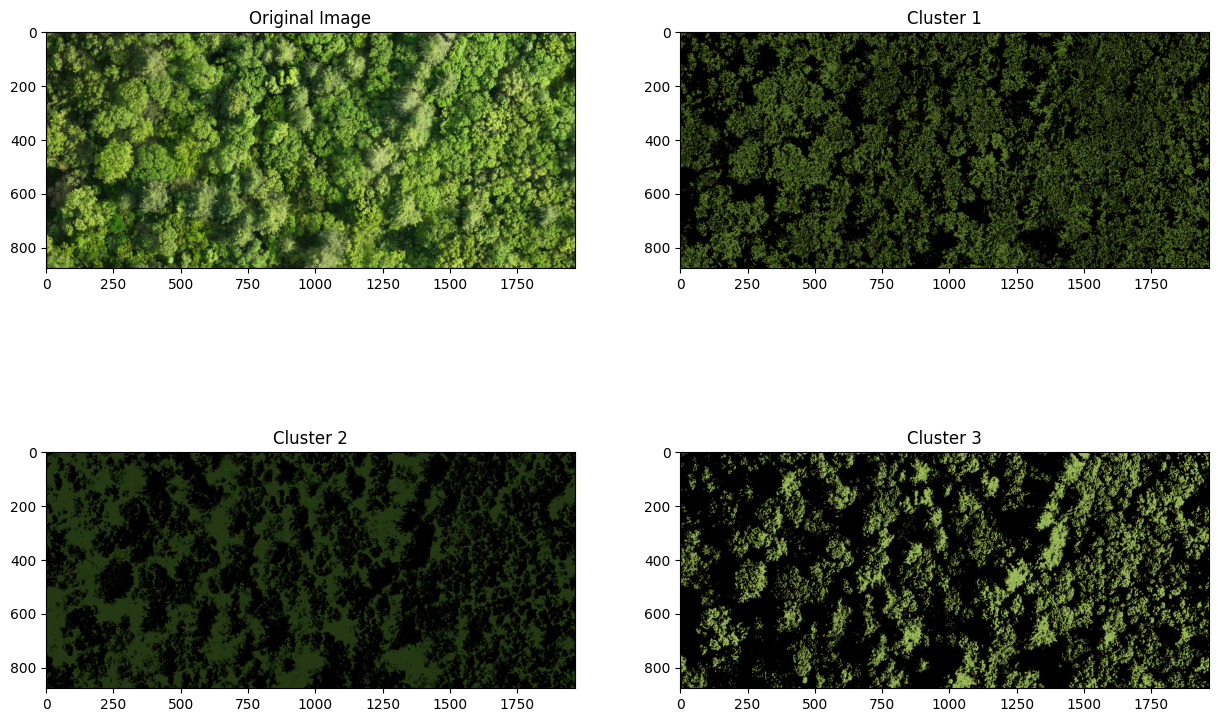

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Read the image
file_path = "h:\\Yehmh\\DNDF\\Clipped_image\\101_1_clipped_image.tif"
image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

if image is None:
    print("Image could not be loaded.")
else:
    # Step 2: Preprocess the image data
    # Extract RGB and alpha channels
    rgb_image = image[:, :, :3]
    alpha_channel = image[:, :, 3]
    
    # Mask where alpha is not zero
    mask = alpha_channel != 0

    # Select only RGB pixels where alpha is not zero
    rgb_pixels = rgb_image[mask]

    # Normalize pixel values to [0, 1]
    rgb_pixels = rgb_pixels / 255.0

    # Step 3: Apply K-Means clustering
    n_clusters = 3
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(rgb_pixels)
    labels = kmeans.labels_
    clustered = kmeans.cluster_centers_[labels]

    # Rescale clustered values back to [0, 255]
    clustered = np.clip(clustered * 255, 0, 255).astype(np.uint8)

    # Step 4: Create Cluster Images
    cluster_images = []
    for i in range(n_clusters):
        cluster_image = np.zeros_like(rgb_image)
        cluster_image[mask] = (labels == i)[:, np.newaxis] * clustered
        cluster_image_with_alpha = np.dstack((cluster_image, alpha_channel))
        cluster_images.append(cluster_image_with_alpha)

    # Step 5: Visualize the Results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA))  # Convert BGRA to RGBA for displaying

    for i in range(n_clusters):
        plt.subplot(2, 2, i + 2)
        plt.title(f"Cluster {i+1}")
        plt.imshow(cv2.cvtColor(cluster_images[i], cv2.COLOR_BGRA2RGBA))  # Convert BGRA to RGBA for displaying

    plt.show()


c:\Users\user\.conda\envs\RS\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\.conda\envs\RS\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


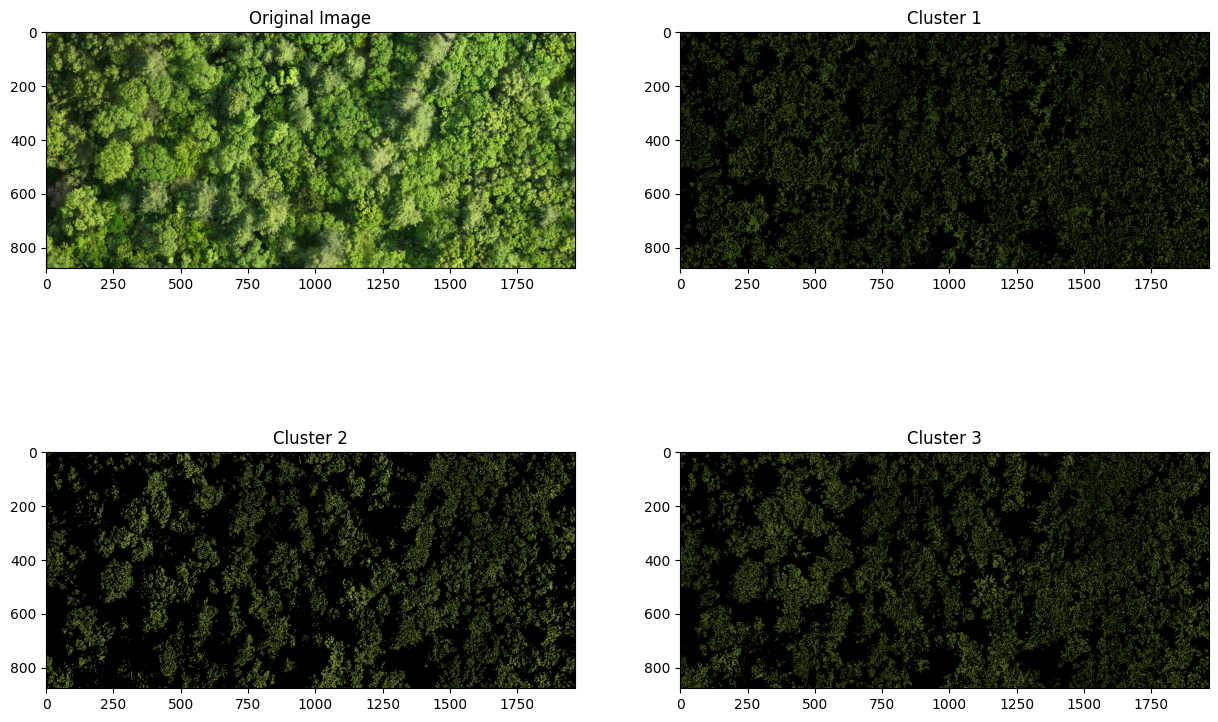

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Read the image
file_path = "h:\\Yehmh\\DNDF\\Clipped_image\\101_1_clipped_image.tif"
image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

if image is None:
    print("Image could not be loaded.")
else:
    # Step 2: Preprocess the image data
    # Extract RGB and alpha channels
    rgb_image = image[:, :, :3]
    alpha_channel = image[:, :, 3]

    # Mask where alpha is not zero
    mask = alpha_channel != 0

    # Select only RGB pixels where alpha is not zero
    rgb_pixels = rgb_image[mask]

    # Normalize pixel values to [0, 1]
    rgb_pixels = rgb_pixels / 255.0

    # Step 3: Apply initial K-Means clustering
    n_clusters = 3
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(rgb_pixels)
    labels = kmeans.labels_
    clustered = kmeans.cluster_centers_[labels]

    # Rescale clustered values back to [0, 255]
    clustered = np.clip(clustered * 255, 0, 255).astype(np.uint8)

    # Step 4: Determine the darkest cluster
    cluster_intensity = np.mean(clustered, axis=1)
    darkest_cluster_index = np.argmin(cluster_intensity)

    # Step 5: Discard pixels belonging to the darkest cluster
    filtered_rgb_pixels = rgb_pixels[labels != darkest_cluster_index]
    filtered_mask = mask.copy()
    filtered_mask[mask] = labels != darkest_cluster_index

    # Step 6: Apply K-Means clustering again
    n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(filtered_rgb_pixels)
    filtered_labels = kmeans.labels_
    clustered_filtered = kmeans.cluster_centers_[filtered_labels]

    # Rescale clustered values back to [0, 255]
    clustered_filtered = np.clip(clustered_filtered * 255, 0, 255).astype(np.uint8)

    # Step 7: Create Cluster Images
    cluster_images = []
    for i in range(n_clusters - 1):
        cluster_image = np.zeros_like(rgb_image)
        cluster_mask = (filtered_labels == i)
        cluster_image[filtered_mask] = cluster_mask[:, np.newaxis] * clustered_filtered
        cluster_image_with_alpha = np.dstack((cluster_image, alpha_channel))
        cluster_images.append(cluster_image_with_alpha)

    # Step 8: Visualize the Results
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA))  # Convert BGRA to RGBA for displaying

    for i in range(n_clusters - 1):
        plt.subplot(2, 2, i + 2)
        plt.title(f"Cluster {i + 1}")
        plt.imshow(cv2.cvtColor(cluster_images[i], cv2.COLOR_BGRA2RGBA))  # Convert BGRA to RGBA for displaying

    plt.show()
